___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://http2.mlstatic.com/D_NQ_NP_2X_960089-MLM26807621582_022018-F.webp" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2024
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___


### <font color= #2E9AFE> Tema: Selección de Variables</font>

La selección de variables es un proceso donde automáticamente se seleccionan aquellos atributos en nuestros datos que contribuyen más a la variable a predecir. 

Las variables irrelevantes o parcialmente relevantes pueden afectar negativamente el rendimiento del modelo.

Beneficios:
- Reducir sobreajuste: menos datos irrelevantes significan menos oportunidades de tomar decisiones basadas en ruido = mejor performance. 
- Modelo más fácil de entender
- Reduce el tiempo de entrenamiento: menos datos significa que el modelo se entrena más rápido


**Tipos de algoritmos de selección de variables**

    - **Métodos de envoltura (wrapper)**: se considera como un problema de búsqueda la selección de un conjunto de variables donde diferentes combinaciones se preparan, evalúan y comparan con otras combinaciones. Se utiliza un modelo predictivo para evaluar una combinación de características y asignar un score basado en la precisión del modelo. 
        - Ejemplo: RFE

    - **Métodos de filtrado**: estos métodos aplican una medida estadística para asignar una puntuación a cada característica. Las características se clasifican según la puntuación y se seleccionan para conservarlas o eliminarlas del conjunto de datos. Los métodos suelen ser univariados y consideran la característica de forma independiente o con respecto a la variable dependiente.
        - Ejemplo: prueba de chi cuadrada, L-Anova, método de correlación, criterio de la varianza

    - **Métodos embebidos (intrinsecos)**: mientras se va creando el modelo el método aprende qué características contribuyen mejor a la precisión. El método más común es el de regularización. 
        - Ejemplo: LASSO, Elastic Net, Ridge, Trees


<img src="https://machinelearningmastery.com/wp-content/uploads/2019/11/Overview-of-Feature-Selection-Techniques3.png" width="550" height="480" align="center"/>


**Mencionando algunas técnicas más comunes:**

- Porcentaje de valores nulos
- Cantidad de variación
- Correlación por parejas
- Mulicolinealidad
- PCA
- Correlación con la variable a predecir (target)
- Forward Selection
- Backward Selection
- Stepwise Selection
- LASSO
- Selección basada en árboles

**¿Cómo elegir las mejores variables?**
No es una respuesta fácil, hay que tratar de varias formas.

# <font color= #2E9AFE> Métodos de Filtrado</font>

### Eliminar variable con % de datos nulos

Cuando hay muchos datos nulos, es difícil para el algoritmo aprender de esos datos (ya que no hay nada)

Hay 2 opciones:
1. Quitar variables que tienen un % alto de datos nulos (si tenemos una variable con más de 90% de datos nulos la quitamos)
   
2. Crear indicadores binarios que explícitamente digan existente / valor nulo



### Métodos de eliminación sólo variables predictoras (X)

Las variables independientes deberían ser eso, independientes... Y esto se debe a que si el grado de correlación entre las variables independientes es alto, no podremos aislar la relación entre cada variable independiente y la variable dependiente (respuesta). 

¡Si no podremos aislar los efectos podríamos confundir sus efectos!

Es decir, cuando las variables independientes están muy correlacionadas los cambios en una variable están asociados con cambios en otra variable y, por tanto, los coeficientes de regresión del modelo ya no van a medir el efecto de una variable independiente sobre la respuesta manteniendo constante, o sin variar, el resto de predictores. 

#### Datos: Glass Identification Data Set
Los datos se pueden encontrar en:
https://archive.ics.uci.edu/ml/datasets/glass+identification

Se busca identificar qué tipo de vidrio es una muestra. 


- 1. Id number: 1 a 214
- 2. RI: Indice Refractivo(medida para saber cuánto se reduce la velocidad de la luz al atravesarlo)
- 3. Na: Sodio (unidad de medida: porcentaje en peso en el óxido correspondiente, como son los atributos 4-10)
- 4. Mg: Magenesio
- 5. Al: Aluminio
- 6. Si: Silicon
- 7. K: Potasio
- 8. Ca: Calcio
- 9. Ba: Bario
- 10. Fe: Hierro
- 11. Tipo de Vidrio: 
-- 1 ventanas de edificios procesadas por flotación 
-- 2 ventanas de edificios no procesadas por flotación 
-- 3 ventanas de vehículos procesadas por flotación
-- 4 ventanas de vehículos no procesadas por flotación 
-- 5 contenedores
-- 6 vajilla
-- 7 faros



In [2]:
#Importar librerías
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos del vidrio (variable a predecir categórica)
data = pd.read_csv('glass.data',header=None)
names = ['ID','Indice_Refraccion','Na','Mg','Al','Si','K', 'Ca','Ba','Fe','Tipo_Vidrio']
data.columns = names

In [3]:
data.head()

,ID,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo_Vidrio
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


¿Qué tipos de datos tenemos aquí? 

Las variables de entrada (independientes) son: Numéricas

La variable de salida (dependiente) es: Categórica


### Criterio de la correlación entre pares (sin tomar en cuenta la variable target "Y")

$$y=\beta_{0}+\beta_{1}X_{1}+\beta_{2}X_{2}+...+\epsilon$$

Cuando existe correlación entre 2 variables predictoras "X", no podemos determinar el efecto de una 1 variable tomando en cuenta que la otra variable es constante ya que las dos variables cambian juntas. 

Cuando se tienen variables relacionadas, se puede considerar que todas las variables proporcionan la misma información al modelo. Por lo que, es deseable seleccionar solo variables que no estén relacionadas y evitar redundancia de información.

Si dos variables están altamente correlacionadas, dejar sólo una va a ayudar a reducir la dimensionalidad sin perder mucha información.

La matriz de correlaciones puede ayudar a visualizar si existen variables candidatas a ser descartadas. Un buen Threshold para eliminar variables, es quitar todas aquellas cuya correlación > 0.6

In [4]:
#Separar X de Y
X = data.iloc[:,1:10] 
Y = data.iloc[:,10]

co= X.corr()
co.style.background_gradient(cmap='coolwarm').format(precision=2)

,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe
Indice_Refraccion,1.00,-0.19,-0.12,-0.41,-0.54,-0.29,0.81,-0.00,0.14
Na,-0.19,1.00,-0.27,0.16,-0.07,-0.27,-0.28,0.33,-0.24
Mg,-0.12,-0.27,1.00,-0.48,-0.17,0.01,-0.44,-0.49,0.08
Al,-0.41,0.16,-0.48,1.00,-0.01,0.33,-0.26,0.48,-0.07
Si,-0.54,-0.07,-0.17,-0.01,1.00,-0.19,-0.21,-0.10,-0.09
K,-0.29,-0.27,0.01,0.33,-0.19,1.00,-0.32,-0.04,-0.01
Ca,0.81,-0.28,-0.44,-0.26,-0.21,-0.32,1.00,-0.11,0.12
Ba,-0.00,0.33,-0.49,0.48,-0.10,-0.04,-0.11,1.00,-0.06
Fe,0.14,-0.24,0.08,-0.07,-0.09,-0.01,0.12,-0.06,1.00


In [5]:
def calcDrop(res):
    # Obtener todas las variables con una correlacion  > 0.6
    all_corr_vars = list(set(res['v1'].tolist() + res['v2'].tolist()))
    
    # Todas las variables únicas en las columnas a remover
    poss_drop = list(set(res['drop'].tolist()))

    # Quedarse con las variables que no estén en las variables a remover
    keep = list(set(all_corr_vars).difference(set(poss_drop)))
     
    p = res[ res['v1'].isin(keep)  | res['v2'].isin(keep) ][['v1', 'v2']]
    q = list(set(p['v1'].tolist() + p['v2'].tolist()))
    drop = (list(set(q).difference(set(keep))))

    poss_drop = list(set(poss_drop).difference(set(drop)))
    
    m = res[ res['v1'].isin(poss_drop)  | res['v2'].isin(poss_drop) ][['v1', 'v2','drop']]
        
    more_drop = set(list(m[~m['v1'].isin(drop) & ~m['v2'].isin(drop)]['drop']))
    for item in more_drop:
        drop.append(item)
         
    return drop


def corrX_new(df, cut=0.6):
    corr_mtx = df.corr().abs()
    avg_corr = corr_mtx.mean(axis=1)
    up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(bool))
    
    dropcols = list()
    results = []
    
    for row in range(len(up) - 1):
        col_idx = row + 1
        for col in range(col_idx, len(up)):
            if corr_mtx.iloc[row, col] > cut:
                if avg_corr.iloc[row] > avg_corr.iloc[col]: 
                    dropcols.append(row)
                    drop = corr_mtx.columns[row]
                else: 
                    dropcols.append(col)
                    drop = corr_mtx.columns[col]
                
                s = pd.Series([corr_mtx.index[row],
                               up.columns[col],
                               avg_corr[row],
                               avg_corr[col],
                               up.iloc[row, col],
                               drop],
                              index=['v1', 'v2', 'v1.target', 'v2.target', 'corr', 'drop'])
        
                results.append(s)
    
    # Concatenate all collected Series into a DataFrame
    res = pd.concat(results, axis=1).T.reset_index(drop=True)
    
    dropcols_names = calcDrop(res)
    
    return dropcols_names

drop = corrX_new(X)
print(drop)

['Ca']


C:\Users\Roi_f\AppData\Local\Temp\ipykernel_52624\316273550.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avg_corr[row],
C:\Users\Roi_f\AppData\Local\Temp\ipykernel_52624\316273550.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avg_corr[col],


La única variable a remover es la del calcio. 

In [6]:
X_no_corr = X.drop(columns=['Ca'], axis=1)

In [7]:
co= X_no_corr.corr()
co.style.background_gradient(cmap='coolwarm').format(precision=2)

,Indice_Refraccion,Na,Mg,Al,Si,K,Ba,Fe
Indice_Refraccion,1.00,-0.19,-0.12,-0.41,-0.54,-0.29,-0.00,0.14
Na,-0.19,1.00,-0.27,0.16,-0.07,-0.27,0.33,-0.24
Mg,-0.12,-0.27,1.00,-0.48,-0.17,0.01,-0.49,0.08
Al,-0.41,0.16,-0.48,1.00,-0.01,0.33,0.48,-0.07
Si,-0.54,-0.07,-0.17,-0.01,1.00,-0.19,-0.10,-0.09
K,-0.29,-0.27,0.01,0.33,-0.19,1.00,-0.04,-0.01
Ba,-0.00,0.33,-0.49,0.48,-0.10,-0.04,1.00,-0.06
Fe,0.14,-0.24,0.08,-0.07,-0.09,-0.01,-0.06,1.00


Ya no existen variables X altamente correlacionadas

### Métodos de eliminación tomando en cuenta X y Y

### Criterio de ANOVA contra la variable target "Y" (ya que es un problema de clasificación con variables de entrada numéricas)

- ANOVA se utiliza para evaluar si hay diferencias significativas en las medias de una variable numérica entre diferentes grupos definidos por una variable categórica.

- NOTA: no tomar en cuenta en el análisis las variables previamente removidas


In [8]:
# Quitar del dataset original las variables que están altamente correlacionadas 
df_reduced = data.drop(columns=["Ca", "ID"], axis=1)


import scipy.stats as stats

# Lista de variables numéricas
variables_numericas = ['Indice_Refraccion', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba',
       'Fe']

# Iteramos sobre cada variable numérica
for variable in variables_numericas:
    grupos = []
    for valor in data['Tipo_Vidrio'].unique():
        grupos.append(data[data['Tipo_Vidrio'] == valor][variable])
    
    # Realizamos ANOVA
    F, p = stats.f_oneway(*grupos)
    print(f'ANOVA para {variable} - F-value: {F}, p-value: {p}')

    # Evaluamos si el p-value es menor que 0.05
    if p < 0.05:
        print(f'La variable {variable} es significativa para predecir Tipo_Vidrio.\n')
    else:
        print(f'La variable {variable} no es significativa para predecir Tipo_Vidrio.\n')


[0     1.52101
1     1.51761
2     1.51618
3     1.51766
4     1.51742
       ...   
65    1.52099
66    1.52152
67    1.52152
68    1.52152
69    1.52300
Name: Indice_Refraccion, Length: 70, dtype: float64, 70     1.51574
71     1.51848
72     1.51593
73     1.51631
74     1.51596
        ...   
141    1.51851
142    1.51662
143    1.51709
144    1.51660
145    1.51839
Name: Indice_Refraccion, Length: 76, dtype: float64, 146    1.51769
147    1.51610
148    1.51670
149    1.51643
150    1.51665
151    1.52127
152    1.51779
153    1.51610
154    1.51694
155    1.51646
156    1.51655
157    1.52121
158    1.51776
159    1.51796
160    1.51832
161    1.51934
162    1.52211
Name: Indice_Refraccion, dtype: float64, 163    1.51514
164    1.51915
165    1.52171
166    1.52151
167    1.51969
168    1.51666
169    1.51994
170    1.52369
171    1.51316
172    1.51321
173    1.52043
174    1.52058
175    1.52119
Name: Indice_Refraccion, dtype: float64, 176    1.51905
177    1.51937
178    1.518

# <font color= #2E9AFE> Métodos de Envoltura (Wrapper)</font>

### Eliminación Recursiva de Características (RFE)

Funciona eliminando atributos de forma recursiva y construyendo un modelo sobre los atributos que quedan.

Usa la precisión del modelo para identificar qué atributos (y combinación de atributos) contribuyen más a predecir el objetivo.

Vamos a utilizar la regresión logística para seleccionar las características principales. La elección del algoritmo no importa demasiado siempre que sea hábil y consistente con el tipo de problema.

In [9]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
#crear modelo de regresión logística
model = LogisticRegression(max_iter=2000)
#crear el recursive feature elimination para la regresión logística, seleccionando sólo 4 variables
rfe = RFE(model)
#ajusta modelo
fit = rfe.fit(X, Y)
print("# de características: %d" % fit.n_features_)
print("Características seleccionadas: %s" % fit.support_)

#true = variable que vamos a dejar

c:\Users\Roi_f\anaconda3\envs\personal\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Roi_f\anaconda3\envs\personal\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

# de características: 4
Características seleccionadas: [False  True  True  True False  True False False False]


In [10]:
data.head()

,ID,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo_Vidrio
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [11]:
X.loc[:, fit.support_]

,Na,Mg,Al,K
0,13.64,4.49,1.10,0.06
1,13.89,3.60,1.36,0.48
2,13.53,3.55,1.54,0.39
3,13.21,3.69,1.29,0.57
4,13.27,3.62,1.24,0.55
...,...,...,...,...
209,14.14,0.00,2.88,0.08
210,14.92,0.00,1.99,0.00
211,14.36,0.00,2.02,0.00
212,14.38,0.00,1.94,0.00


El RFE eligió las siguientes variables: Na, Mg, Al, K 
Están marcadas como "True". 
De igual manera, los resultados pueden variar dependiendo de la naturaleza estocástica del algoritmo o el proceso de evaluación, o diferencias en la precisión numérica. Se recomienda correr el ejercicio varias veces para comparar el resultado promedio.

# <font color= #2E9AFE> Métodos embebidos (intrínsecos)</font>

### Selección de variables basada en árboles

Modelos basados en árboles como el "Random Forest" ya tienen dentro de su proceso un método de seleción de variables donde estiman la importancia de los atributos. 

Construimos un Clasificador de "Random Forest"

In [12]:
X

,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


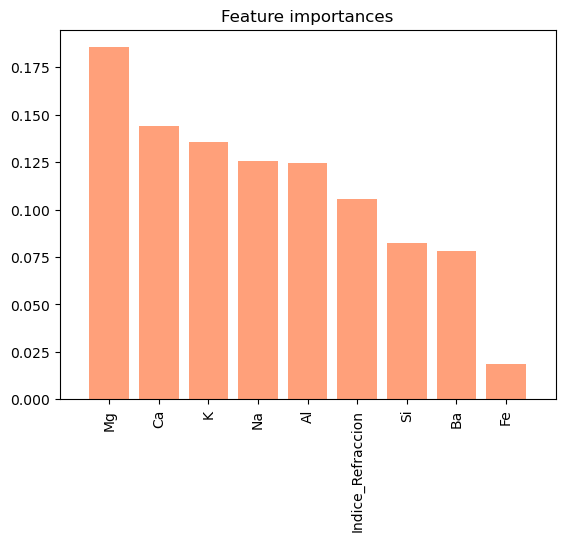

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

#Inicializamos el modelo
rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
#Entrenamos el modelo
rf.fit(X_train, y_train)
#Guardamos la importancia de las variables y graficamos
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

#Seleccionamos 
sfm = SelectFromModel(rf, threshold=0.06)
sfm.fit(X_train, y_train)
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)
rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
rf.fit(X_important_train, y_train)
y_pred = rf.predict(X_important_test)

Las 4 variables más importantes serían: Mg, Al, Ca e Indice de Refraccion 

### Regularización Least Absolute Shrinkage and Selection Operator (LASSO)

Lo que hace LASSO es que tiene un parámetro de regularización que penaliza a algunas variables y las hace cero. 

In [14]:
#Separar en datos de entrenamiento y de prueba
X= data.drop(labels=['ID', 'Tipo_Vidrio'], axis=1)
Y= data['Tipo_Vidrio']

In [15]:
data.head()

,ID,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo_Vidrio
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [16]:
data.shape

(214, 11)

La mayoría de los modelos lineales se benefician de escalar los datos. 

In [17]:
#Escalar datos de entrenamiento
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [18]:
##LASSO
from sklearn.feature_selection import SelectFromModel
sel=LogisticRegression(C=1, penalty='l1', solver='liblinear', max_iter=1000).fit(X,Y) #LASSO  = L1
sel=SelectFromModel(sel, prefit=True) #seleccion de variable
X_new=sel.transform(X)
X_new.shape

c:\Users\Roi_f\anaconda3\envs\personal\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(214, 8)

In [19]:
X.columns[sel.get_support()]

Index(['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

El modelo quitó la variable "Indice de Refracción"

### ¿Cuál es el mejor método?

...no hay...

Se tiene que hacer experimentación para ver qué método funciona mejor para el problema en específico. 

### Referencias:

- Comparison of F-test and mutual information: https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py
- Feature selection: https://scikit-learn.org/stable/modules/feature_selection.html


<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Sara E. Rodríguez.
</footer>